In [6]:
from Helper_Functions import *
from Create_Fake_Data import *
from copy import deepcopy

file_name = "Data/32108472_LiCl_sucrose_peptide_output.csv"
plot_top = 80 # ensures all the graphs are scaled the same
data = pd.read_csv(file_name, na_values=['-', 'ND'], header=[0])

# generate the fake data columns
random_data = generate_random(deepcopy(data))
resampled_data = generate_resampled(deepcopy(data))
imputed_mean_data = generate_imputed_mean(deepcopy(data))
imputed_median_data = generate_imputed_median(deepcopy(data))
# print(random_data)
# print(resampled_data)
# print(imputed_mean_data)
# # analyze correlation coefficients and generate graphs for each data set
# analyze_correlation(data, False, "real", plot_top, graph=True)
# analyze_correlation(random_data, False, "random", plot_top, graph=True)
# analyze_correlation(resampled_data, False, "resampled", plot_top, graph=True)
# analyze_correlation(imputed_mean_data, False,  "imputed mean", plot_top, graph=True)
# analyze_correlation(imputed_median_data, False, "imputed median", plot_top, graph=True)


        Intensity  Intensity 30_1  Intensity 30_2  Intensity 30_3  \
0        580130.0          140580         94262.0         74551.0   
1      47934000.0         4088400             0.0       3175900.0   
2       8378000.0          559180        351570.0        321130.0   
3     728120000.0        87938000      73631000.0      80889000.0   
4      32044000.0         6807500       4300900.0        103650.0   
...           ...             ...             ...             ...   
7509     273740.0               0         57855.0             0.0   
7510    1149700.0          183150        188850.0        113470.0   
7511    8411000.0         1501000       1264800.0             0.0   
7512   49859000.0         7336100       2190100.0       2005800.0   
7513    1496200.0          188570        140460.0             0.0   

      Intensity 35_1  Intensity 35_2  Intensity 35_3  Intensity 40_1  \
0                0.0         70253.0         50479.0               0   
1          3487700.0       

In [2]:
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

# returns a dataframe with the frequency of digits 0-9 from given list of nums
def get_frequencies(nums):
    freqs_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for num in nums:
        if not pd.isna(num):
            freqs_list[num] += 1
    freqs_df = pd.DataFrame(freqs_list, index=range(0, 10), columns=['freq'])

    return freqs_df

#returns the last digit of a number
def last_digit(num):
    # if the value is na or 0, return
    if pd.isna(num):
        return
    if num == 0:
        return
    # otherwise, return the last digit
    else:
        num = abs(int(num))
        return(int(str(num)[0]))

In [3]:
dataframes = [data, random_data, resampled_data, imputed_mean_data, imputed_median_data]

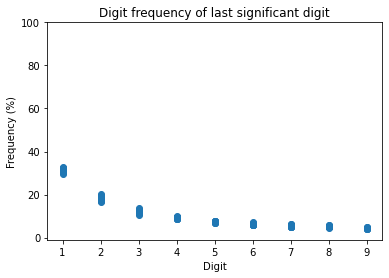

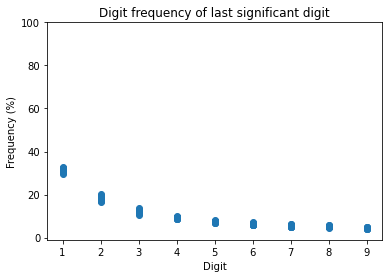

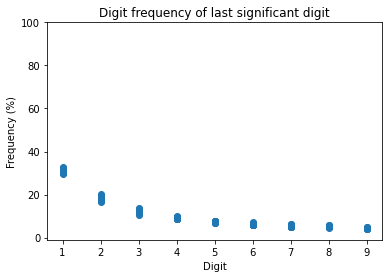

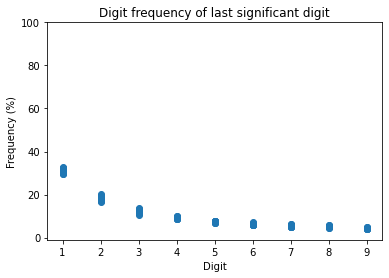

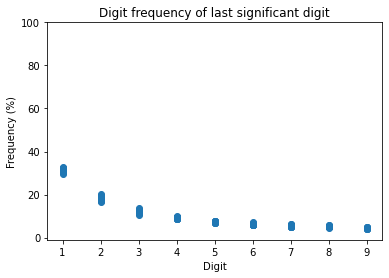

In [4]:
for df in dataframes:
    # read in the file and set up dictionaries to hold the digits and digit frequencies
    last_digit_dict = {}
    last_digit_freq = {}

    # iterate through all the columns in the file
    for column in df:
        # grab the numbers in the columns
        nums = df[column]
        # for each number in the column, store the last digit
        last_dig = [last_digit(num) for num in nums]
        # store the last digits of each column in a dictionary
        last_digit_dict[column] = last_dig

    # create a variable to hold the percentages of each digit in each column
    column_data = {}

    # iterate through each column
    for key in last_digit_dict.keys():
        # get the frequencies for each digit in the column
        frequencies = get_frequencies(last_digit_dict[key])
        # calculate the percentage
        frequencies['Percentage'] = frequencies['freq'] / sum(frequencies['freq']) * 100
        # store the percentages
        last_digit_freq[key] = frequencies

        # put the percentages in the dictionary
        column_data[key] = frequencies['Percentage']

    # put the data in a dataframe
    frequency_data = pd.DataFrame(column_data)
    frequency_data = frequency_data.drop([0])
    # transpose the dataframe to combine frequencies into 1 column
    frequency_data_transposed = pd.DataFrame(frequency_data).T.stack().reset_index()
    # rename the columns
    frequency_data_transposed = frequency_data_transposed.rename(columns={0: "percentage", "level_1": "Digit"})

    # we want to color by authentic and fabricated 
#     colors = {"Odom Reading 1 (Previous)": "black", "Odom Reading 1 (Update)": "red", "Odom Reading 2 (Previous)": "black", "Odom Reading 2 (Update)": "red", "Odom Reading 3 (Previous)": "black", "Odom Reading 3 (Update)": "red", "Odom Reading 4 (Previous)": "black", "Odom Reading 4 (Update)":"red"}
#     authentic = Line2D([], [], marker ='o', color='k', label='Authentic',
#                              markerfacecolor='k', markersize=6, linestyle='None')
#     fabricated = Line2D([], [], marker ='o', color='r', label='Fabricated',
                          #   markerfacecolor='r', markersize=6, linestyle='None')

    # plot the data
    # , c=frequency_data_transposed['level_0'].map(colors)
    plt.scatter(x = 'Digit', y = 'percentage', data = frequency_data_transposed)
    plt.xticks([1,2,3,4,5,6,7,8,9])
    plt.ylim(-1, 100)
    plt.ylabel("Frequency (%)")
    plt.xlabel("Digit")
    plt.title("Digit frequency of last significant digit")
#     plt.legend(handles=[authentic, fabricated])
    #plt.legend(('Authentic', 'Fabricated'))
    # plt.savefig('Figures/Figure2', dpi=300)
    plt.show()